<a href="https://colab.research.google.com/github/AriyantGit/AriyantGit/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Import necessary module")

Import necessary module


In [3]:
dataset_url=r"https://raw.githubusercontent.com/AriyantGit/Laprop_price_regression/main/laptop_data.csv"
df=pd.read_csv(dataset_url)

In [4]:
laptop_df=df.copy()
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=["Unnamed: 0"],inplace=True,axis=1)

In [10]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [11]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [12]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [13]:
df["Weight"]=df["Weight"].astype("float32")
df["Ram"]=df["Ram"].astype("int32")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Text(0.5, 0, 'Price')

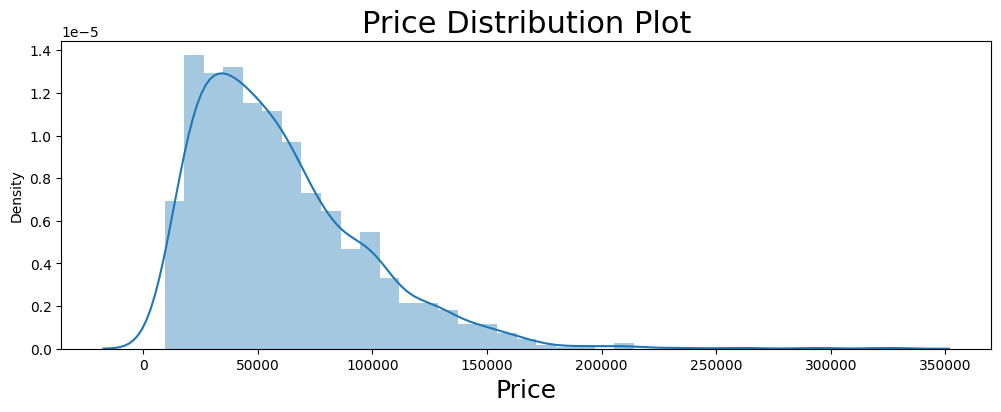

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(df["Price"])
plt.title("Price Distribution Plot",size=22)
plt.xlabel("Price",size=18)

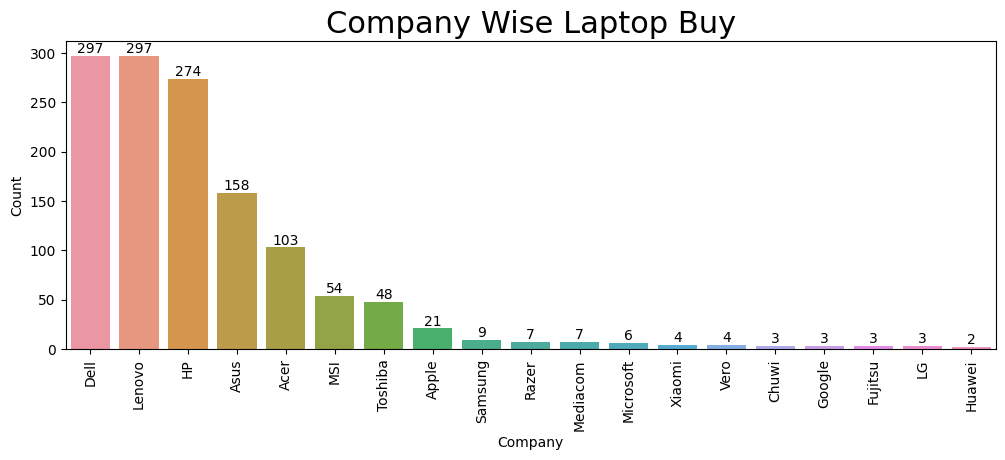

In [16]:
plt.figure(figsize=(12,4))
company_with_count=pd.DataFrame(df["Company"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Company","Company":"Count"},inplace=True)
bar=sns.barplot(x="Company",y="Count",data=company_with_count)
for label in bar.containers:
    bar.bar_label(label)
plt.title("Company Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

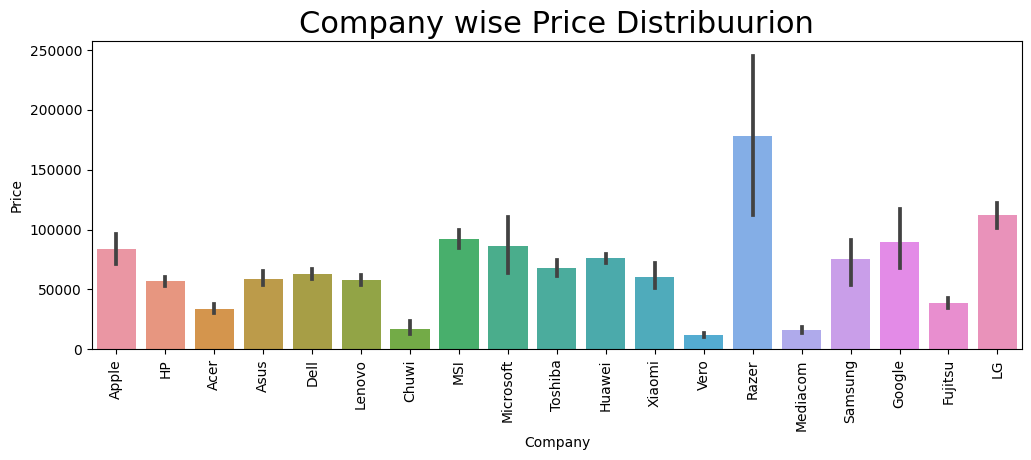

In [17]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["Company"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Company wise Price Distribuurion",size=22)
plt.show()


In [18]:
df["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

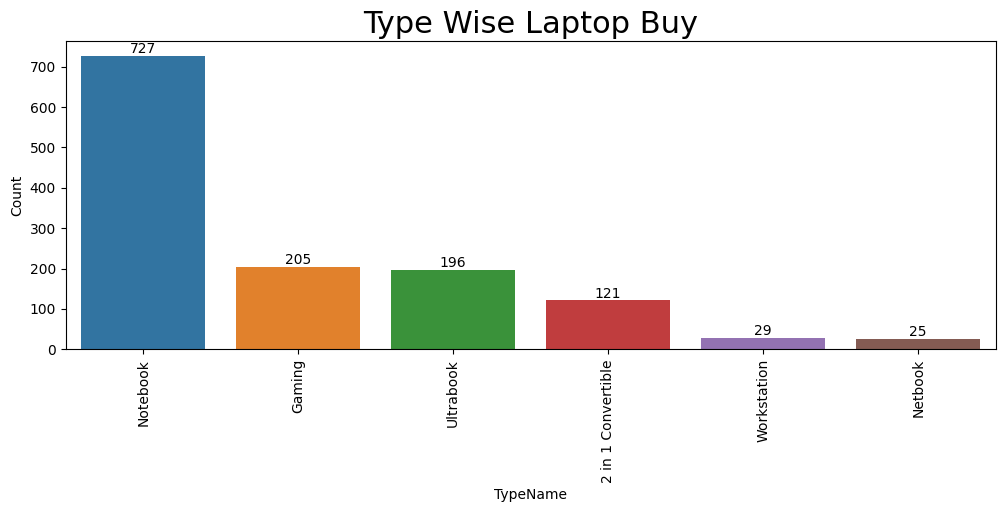

In [20]:
plt.figure(figsize=(12,4))
company_with_count=pd.DataFrame(df["TypeName"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"TypeName","TypeName":"Count"},inplace=True)
bar=sns.barplot(x="TypeName",y="Count",data=company_with_count)
for label in bar.containers:
    bar.bar_label(label)
plt.title("Type Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

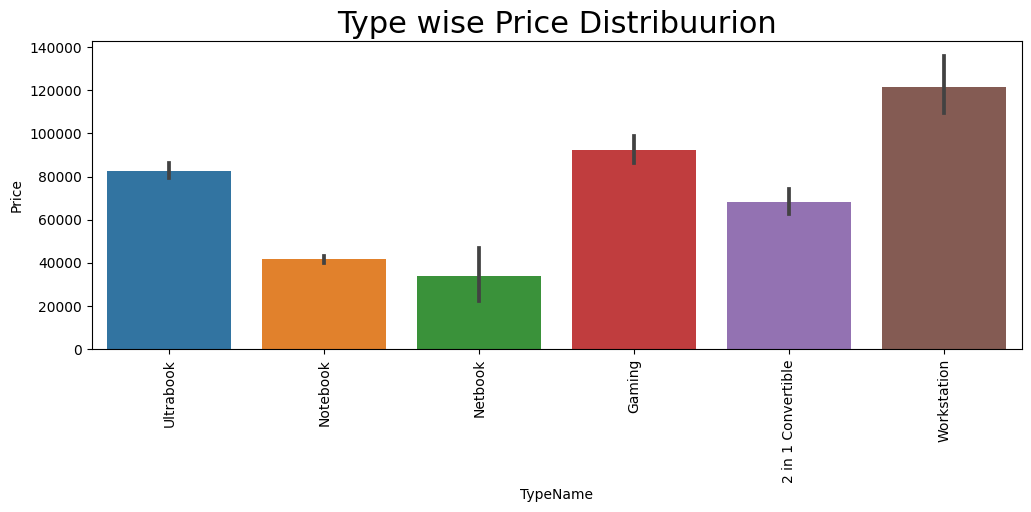

In [21]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["TypeName"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Type wise Price Distribuurion",size=22)
plt.show()

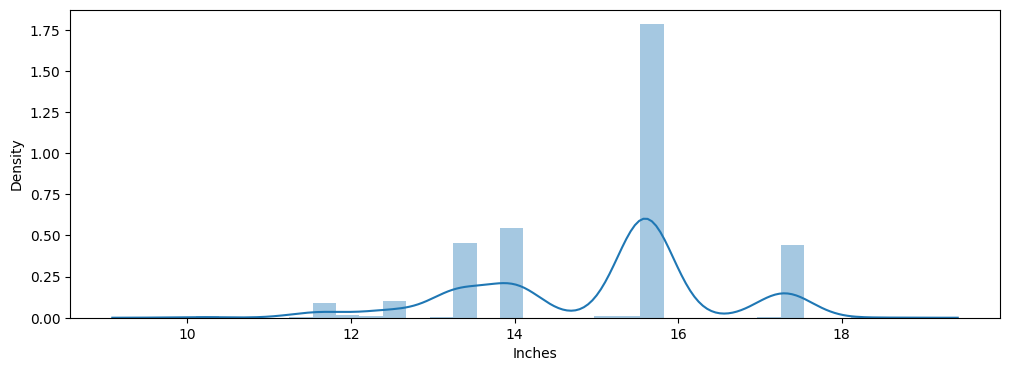

In [25]:
plt.figure(figsize=(12,4))
sns.distplot(df["Inches"])
plt.show()

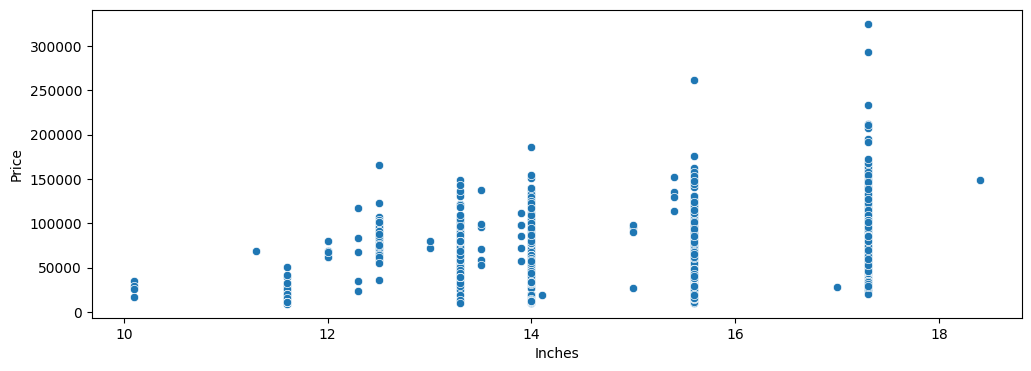

In [26]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=df["Inches"],y=df["Price"])
plt.show()

In [32]:
df["TouchScreen"]=df["ScreenResolution"].apply(lambda x:1 if "touchscreen" in x.lower() else 0)

In [33]:
df["TouchScreen"].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

[<BarContainer object of 2 artists>]


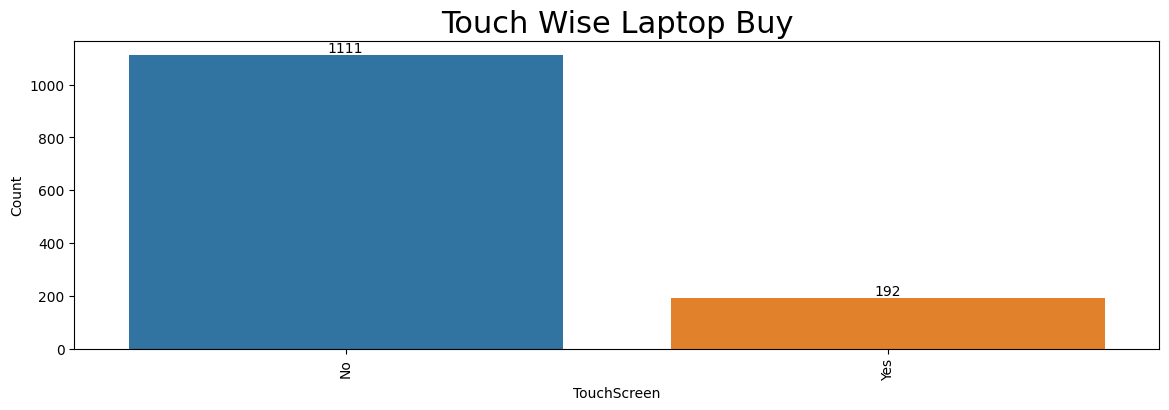

In [58]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["TouchScreen"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"TouchScreen","TouchScreen":"Count"},inplace=True)
company_with_count["TouchScreen"]=company_with_count["TouchScreen"].apply(lambda x:"Yes" if x==1 else "No")
bar=sns.barplot(x="TouchScreen",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Touch Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

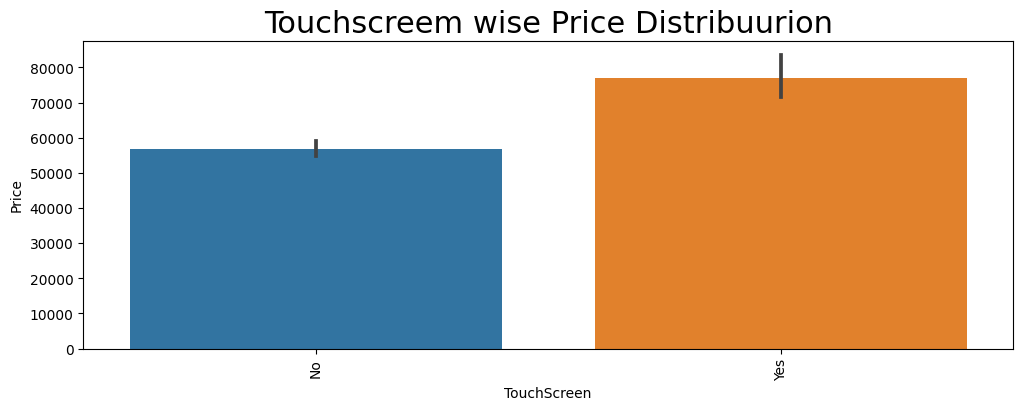

In [72]:
touch_price=df[["TouchScreen","Price"]]
touch_price["TouchScreen"]=touch_price["TouchScreen"].apply(lambda x:"Yes" if x==1 else "No")
touch_price.sample(5)


plt.figure(figsize=(12,4))

plot=sns.barplot(x=touch_price["TouchScreen"],y=touch_price["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Touchscreem wise Price Distribuurion",size=22)
plt.show()

In [73]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

[<BarContainer object of 2 artists>]


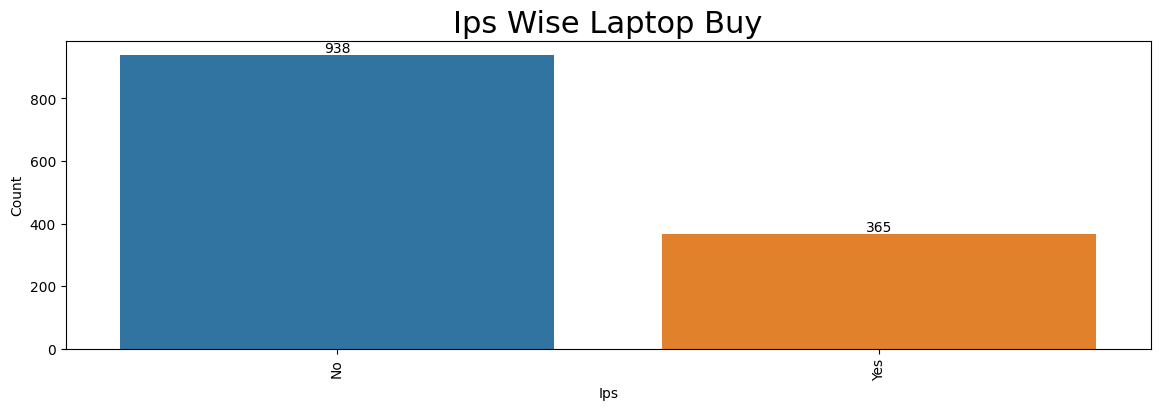

In [74]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["Ips"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Ips","Ips":"Count"},inplace=True)
company_with_count["Ips"]=company_with_count["Ips"].apply(lambda x:"Yes" if x==1 else "No")
bar=sns.barplot(x="Ips",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Ips Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

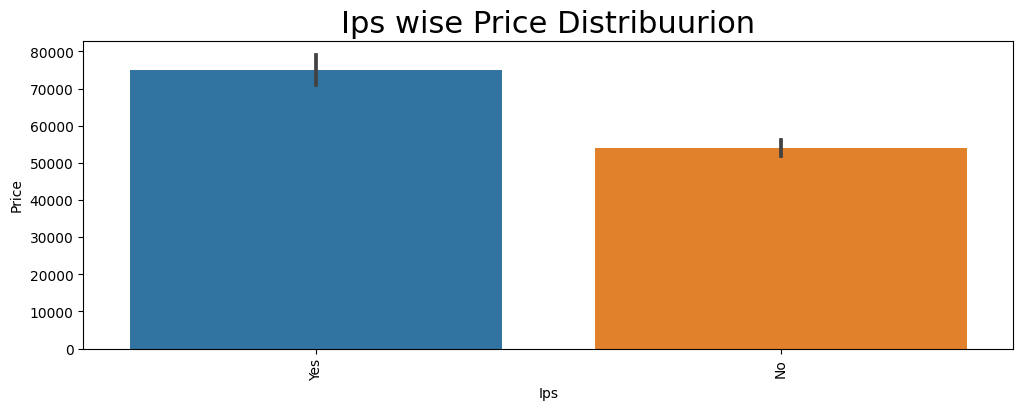

In [75]:
ips_price=df[["Ips","Price"]]
ips_price["Ips"]=ips_price["Ips"].apply(lambda x:"Yes" if x==1 else "No")
ips_price.sample(5)


plt.figure(figsize=(12,4))

plot=sns.barplot(x=ips_price["Ips"],y=ips_price["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Ips wise Price Distribuurion",size=22)
plt.show()

In [92]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [93]:
new[0]=new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [96]:
df["X_resolution"]=new[0].astype("int64")
df["Y_resolution"]=new[1].astype("int64")
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,Y_resolution,X_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  Y_resolution      1303 non-null   int64  
 14  X_resolution      1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [99]:
df.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
Ips             0.252208
Y_resolution    0.552809
X_resolution    0.556529
Name: Price, dtype: float64

In [100]:
df["PPI"]=((df["X_resolution"]**2+df["Y_resolution"]**2)**0.5)/df["Inches"].astype("float")

In [101]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,Y_resolution,X_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940


In [102]:
df.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
Ips             0.252208
Y_resolution    0.552809
X_resolution    0.556529
PPI             0.473487
Name: Price, dtype: float64

In [103]:
df.drop(columns=['Y_resolution',"X_resolution","Inches",'ScreenResolution'],inplace=True)

In [105]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
